<a href="https://colab.research.google.com/github/jinkim-com/ESPS0015/blob/main/Trump_DiD_Analysis_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and cleaning the data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import warnings
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt

In [7]:
url = "https://raw.githubusercontent.com/jinkim-com/ESPS0015/937e3c870266aeec8aac4860642e6f22ea0853a3/HSall_members.csv"
old_df = pd.read_csv(url)
old_df.head()

,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,...,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
0,1,President,99869,99,0.0,USA,5000,NaN,NaN,"WASHINGTON, George",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,House,379,44,2.0,GA,4000,0.0,1.0,"BALDWIN, Abraham",...,1807.0,-0.165,-0.373,-28.55029,0.758,103.0,12.0,NaN,-0.429,-0.817
2,1,House,4854,44,1.0,GA,4000,0.0,1.0,"JACKSON, James",...,1806.0,-0.320,-0.181,-24.89986,0.776,98.0,9.0,NaN,-0.559,-0.052
3,1,House,6071,44,3.0,GA,4000,0.0,1.0,"MATHEWS, George",...,1812.0,-0.428,-0.317,-12.62728,0.880,99.0,2.0,NaN,-0.413,-0.232
4,1,House,1538,52,6.0,MD,5000,0.0,1.0,"CARROLL, Daniel",...,1796.0,0.116,-0.740,-23.47008,0.783,96.0,11.0,NaN,0.114,-0.779


In [149]:
df = old_df[(old_df['congress'] >= 106)]
df

,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,...,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
43340,106,President,99909,99,0.0,USA,100,0.0,0.0,"CLINTON, William Jefferson (Bill)",...,NaN,-0.438,0.033,-44.00832,0.74300,148.0,17.0,NaN,NaN,NaN
43341,106,House,15090,41,1.0,AL,200,0.0,1.0,"CALLAHAN, Herbert Leon (Sonny)",...,2021.0,0.373,0.202,-156.97696,0.83000,842.0,61.0,NaN,0.290,0.263
43342,106,House,29100,41,5.0,AL,100,0.0,1.0,"CRAMER, Robert E. (Bud), Jr.",...,NaN,-0.132,0.612,-241.95350,0.75500,861.0,102.0,NaN,-0.124,0.540
43343,106,House,29300,41,2.0,AL,200,0.0,1.0,"EVERETT, Robert Terry",...,2024.0,0.414,0.528,-120.12012,0.86600,834.0,43.0,NaN,0.447,0.563
43344,106,House,29301,41,6.0,AL,200,0.0,1.0,"BACHUS, Spencer T., III",...,NaN,0.387,0.228,-197.21883,0.79600,863.0,83.0,NaN,0.305,0.103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51039,119,Senate,42504,56,0.0,WV,200,NaN,NaN,"JUSTICE, James Conley, II",...,NaN,0.779,0.337,-0.42411,0.99812,225.0,0.0,NaN,0.780,0.326
51040,119,Senate,29940,25,0.0,WI,100,NaN,NaN,"BALDWIN, Tammy",...,NaN,-0.488,-0.132,-26.12223,0.89522,236.0,17.0,NaN,-0.399,-0.038
51041,119,Senate,41111,25,0.0,WI,200,NaN,NaN,"JOHNSON, Ron",...,NaN,0.640,-0.140,-1.38114,0.99419,237.0,0.0,NaN,0.772,0.326
51042,119,Senate,20953,68,0.0,WY,200,NaN,NaN,"LUMMIS, Cynthia M.",...,NaN,0.685,-0.329,-2.08741,0.99060,221.0,0.0,NaN,0.774,0.319


# Visualisation of Data

In [158]:
columns = ['congress', 'nominate_dim1', 'party_code']
subset_df = df[columns]

summarystats = subset_df.describe().round(2)
print(f"1. Table of Summary Statistics: \n\n{summarystats}")


1. Table of Summary Statistics: 

       congress  nominate_dim1  party_code
count   7704.00        7688.00     7704.00
mean     112.52           0.05      151.69
std        4.02           0.44       51.21
min      106.00          -0.78      100.00
25%      109.00          -0.37      100.00
50%      113.00           0.15      200.00
75%      116.00           0.45      200.00
max      119.00           0.99      328.00


<Axes: xlabel='congress', ylabel='nominate_dim1'>

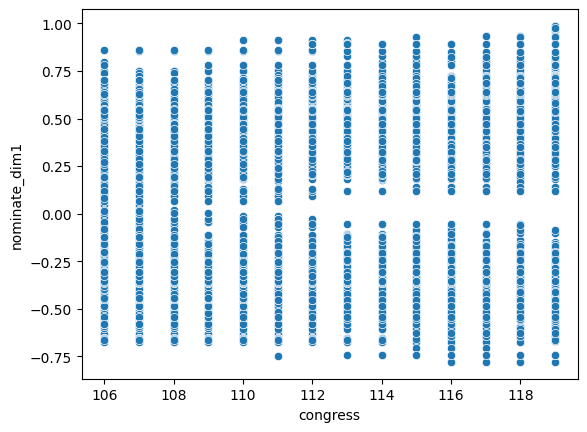

In [159]:
sns.scatterplot(x='congress', y='nominate_dim1', data=subset_df)


In [160]:
model = ols('nominate_dim1 ~  congress', data=df).fit()

table=summary_col(
    [model],
    stars=True,
    float_format='%0.3f',
    model_names=['Model'],
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))})

print(f"Regression Table: \n\n{table}")



Regression Table: 


                 Model  
------------------------
Intercept      -0.470***
               (0.140)  
congress       0.005*** 
               (0.001)  
R-squared      0.002    
R-squared Adj. 0.002    
N              7688     
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01


In [163]:
models=[]
names=[]
congresses=df['congress'].unique()

for congress in congresses:
    df_year = df[df['congress'] == congress]
    model= ols('nominate_dim1 ~ party_code', data=df_year).fit()
    models.append(model)
    names.append(str(congress))

table=summary_col(
    models,
    stars=True,
    float_format='%0.3f',
    model_names=names,
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))})

print(table)


                  106       107       108       109       110       111       112       113       114       115       116       117       118       119   
----------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept      -1.069*** -1.053*** -1.066*** -1.097*** -1.109*** -1.092*** -1.175*** -1.158*** -1.178*** -1.179*** -1.149*** -1.188*** -1.148*** -1.227***
               (0.023)   (0.024)   (0.024)   (0.024)   (0.021)   (0.021)   (0.022)   (0.024)   (0.025)   (0.024)   (0.024)   (0.023)   (0.027)   (0.026)  
party_code     0.007***  0.007***  0.007***  0.007***  0.008***  0.008***  0.008***  0.008***  0.008***  0.008***  0.008***  0.008***  0.008***  0.009*** 
               (0.000)   (0.000)   (0.000)   (0.000)   (0.000)   (0.000)   (0.000)   (0.000)   (0.000)   (0.000)   (0.000)   (0.000)   (0.000)   (0.000)  
R-squared      0.830     0.807     0.816     0.826     0.850     0.83

# Difference in Differences (DiD) Analysis

In [154]:
!pip install linearmodels

In [155]:
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.formula.api as smf
from linearmodels.panel import compare


In [166]:
did = did.sort_values(by=['party_code', 'congress'])
did['delta_nominate'] = did.groupby('party_code')['nominate_dim1'].diff()
did['abs_delta_nominate'] = did['delta_nominate'].abs()



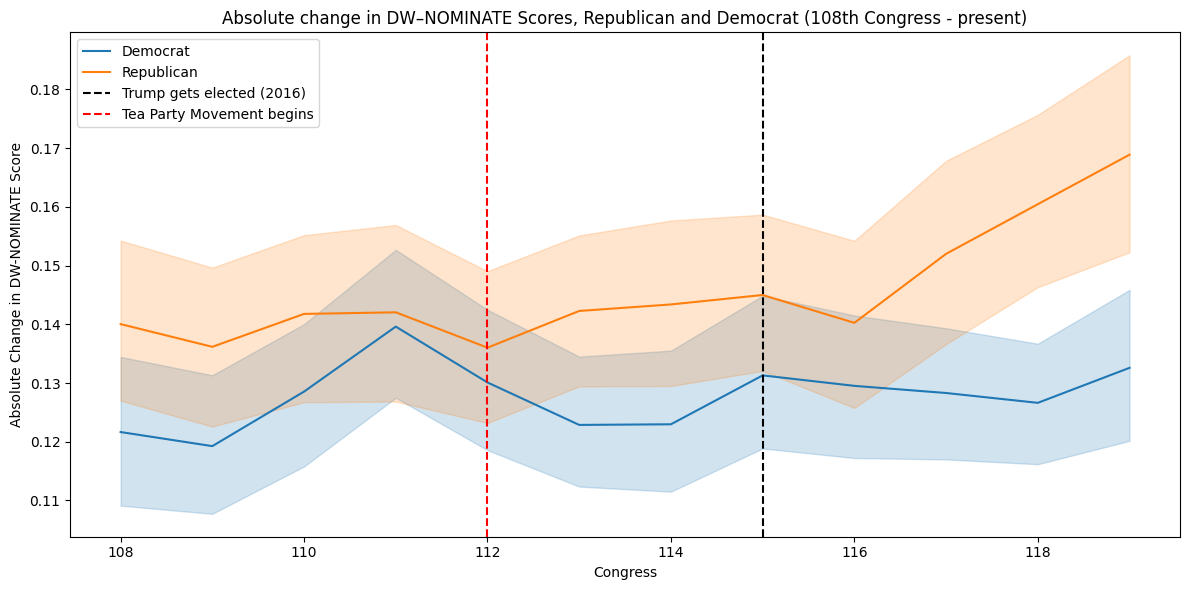

In [177]:
did = did[did['congress'] >= 108]

plt.figure(figsize=(12, 6))
sns.lineplot(data=did, x='congress', y='abs_delta_nominate', hue='party')
plt.axvline(x=115, color='black', linestyle='--', label='Trump gets elected (2016)')
plt.axvline(x=112, color='red', linestyle='--', label='Tea Party Movement begins')
plt.title('Absolute change in DW–NOMINATE Scores, Republican and Democrat (108th Congress - present)')
plt.xlabel('Congress')
plt.ylabel('Absolute Change in DW-NOMINATE Score')
plt.legend()
plt.tight_layout()
plt.show()



In [180]:
df['post'] = (df['congress'] >= 115).astype(int)

df['party'] = df['party_code'].map({100: 'Democrat', 200: 'Republican'})


subset = df[df['party'].isin(['Democrat', 'Republican'])].copy()
summary_stats = (
    subset
    .groupby(['party', 'post'])['nominate_dim1']
    .describe()[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
    .reset_index()
)

summary_stats['Period'] = summary_stats['post'].map({0: 'Pre-2016', 1: 'Post-2016'})
summary_stats.drop(columns='post', inplace=True)


summary_stats = summary_stats[['party', 'Period', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]


print(summary_stats)



        party     Period   mean    std    min    25%    50%    75%    max
0    Democrat   Pre-2016 -0.363  0.129 -0.747 -0.450 -0.367 -0.283  0.146
1    Democrat  Post-2016 -0.375  0.117 -0.780 -0.450 -0.375 -0.296 -0.057
2  Republican   Pre-2016  0.436  0.151 -0.018  0.333  0.424  0.539  0.913
3  Republican  Post-2016  0.508  0.157  0.120  0.399  0.500  0.616  0.987


<ipython-input-180-1fe3927375f1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-180-1fe3927375f1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Bibliography

**References**

Ballinger, O. (2024). 'Week 8: Difference-in-Differences', BASC0005: Quantitative Methods 2. University College London. Available at: https://oballinger.github.io/QM2/

Kim, Yoon Jin (2024). 'NLP Trump 2020. University College London. Available at: https://github.com/jinkim-com/qm2coursework


Lewis, Jeffrey B., Keith Poole, Howard Rosenthal, Adam Boche, Aaron Rudkin, and Luke Sonnet (2025). Voteview: Congressional Roll-Call Votes Database. https://voteview.com/



